In [1]:
# 0) Kütüphaneler ve sürümler
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
try:
    import sklearn
    print("Scikit-learn:", sklearn.__version__)
except Exception as e:
    print("Scikit-learn yok veya yüklenemedi:", e)


Pandas: 2.3.2
NumPy: 2.3.2
Scikit-learn: 1.7.1


In [2]:
# 1) Veriyi yükleme (yolu kendi projenize göre düzenleyin)
# Örn: '../data/Talent_Academy_Case_DT_2025.xlsx'
from pathlib import Path
data_path = Path("../data/Talent_Academy_Case_DT_2025.xlsx")
df = pd.read_excel(data_path)
df.head()


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [4]:
# 2) Genel bilgiler
display(df.shape)
display(df.dtypes)
display(df.info())  # konsola yazdırır
display(df.describe(include='all').T.head(20))

# Eksik değer sayıları
na_counts = df.isna().sum().sort_values(ascending=False)
display(na_counts)


(2235, 13)

HastaNo             int64
Yas                 int64
Cinsiyet           object
KanGrubu           object
Uyruk              object
KronikHastalik     object
Bolum              object
Alerji             object
Tanilar            object
TedaviAdi          object
TedaviSuresi       object
UygulamaYerleri    object
UygulamaSuresi     object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HastaNo,2235.0,NaN,NaN,NaN,145333.100224,115.214248,145134.0,145235.0,145331.0,145432.0,145537.0
Yas,2235.0,NaN,NaN,NaN,47.327069,15.208634,2.0,38.0,46.0,56.0,92.0
Cinsiyet,2066,2,Kadın,1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KanGrubu,1560,8,0 Rh+,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uyruk,2235,5,Türkiye,2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KronikHastalik,1624,220,Myastenia gravis,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bolum,2224,10,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alerji,1291,38,Polen,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tanilar,2160,367,"DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE",149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TedaviAdi,2235,244,Dorsalji -Boyun+trapez,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alerji             944
KanGrubu           675
KronikHastalik     611
UygulamaYerleri    221
Cinsiyet           169
Tanilar             75
Bolum               11
HastaNo              0
Yas                  0
Uyruk                0
TedaviAdi            0
TedaviSuresi         0
UygulamaSuresi       0
dtype: int64

In [5]:
# 3) ID ve tekrar kontrolü (HastaNo varsayımı)
if 'HastaNo' in df.columns:
    print("HastaNo null:", df['HastaNo'].isna().sum())
    print("HastaNo benzersiz:", df['HastaNo'].nunique() == len(df))
    dup = df[df['HastaNo'].duplicated(keep=False)].sort_values('HastaNo')
    if not dup.empty:
        print("Tekrarlı ID kayıtları:")
        display(dup.head(10))
else:
    print("HastaNo sütunu bulunamadı — atlanıyor.")


HastaNo null: 0
HastaNo benzersiz: False
Tekrarlı ID kayıtları:


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
5,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
6,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,30 Dakika
7,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,20 Dakika
8,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,20 Dakika
9,145137,65,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Dis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,15 Seans,Sol El Bilek Bölgesi,15 Dakika
10,145137,65,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Dis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,15 Seans,Sol El Bilek Bölgesi,20 Dakika


Sayısal sütunlar: ['HastaNo', 'Yas']


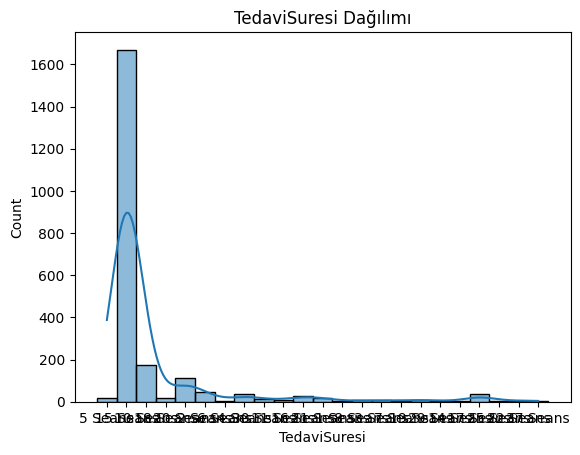

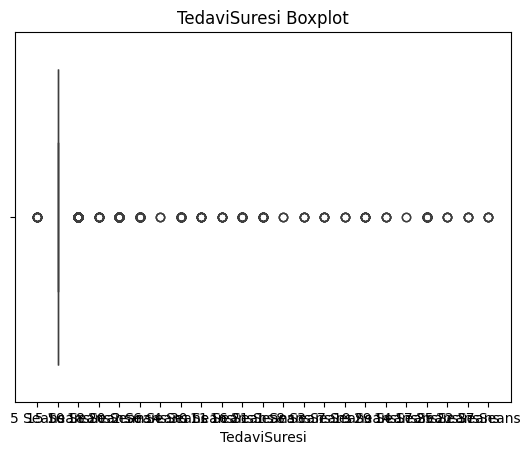

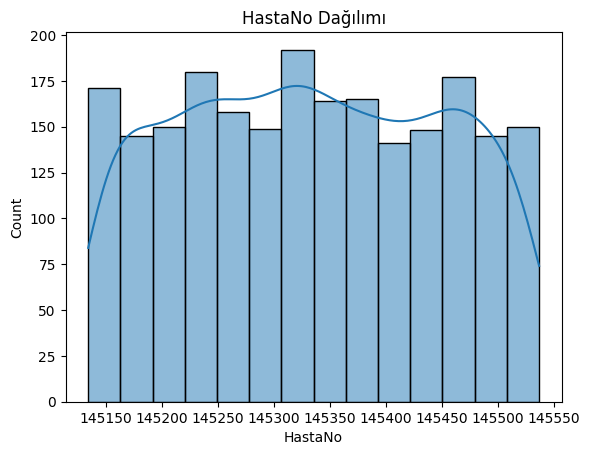

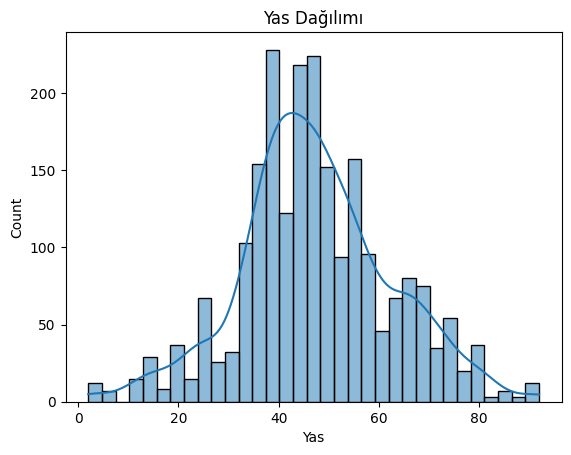

In [7]:
# 4) Sayısal dağılımlar & hedef (TedaviSuresi)
num_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Sayısal sütunlar:", num_cols)

# Hedef dağılımı (varsa)
if 'TedaviSuresi' in df.columns:
    sns.histplot(df['TedaviSuresi'], kde=True)
    plt.title('TedaviSuresi Dağılımı')
    plt.show()
    sns.boxplot(x=df['TedaviSuresi'])
    plt.title('TedaviSuresi Boxplot')
    plt.show()

# Tüm sayısallar için histogram (ilk 6 sütun örnek)
for c in num_cols[:6]:
    if c != 'TedaviSuresi':
        sns.histplot(df[c], kde=True)
        plt.title(f'{c} Dağılımı')
        plt.show()


Kategorik sütunlar: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']

Cinsiyet — ilk 20 kategori:


Cinsiyet
Kadın    1274
Erkek     792
NaN       169
Name: count, dtype: int64

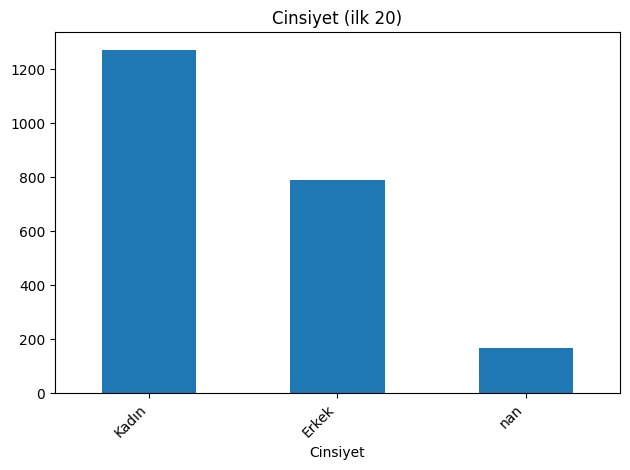


KanGrubu — ilk 20 kategori:


KanGrubu
NaN       675
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
A Rh-      53
0 Rh-      26
AB Rh-      8
Name: count, dtype: int64

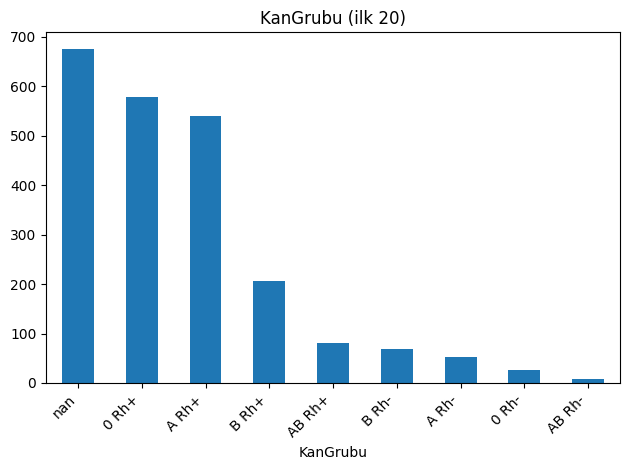


Uyruk — ilk 20 kategori:


Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64

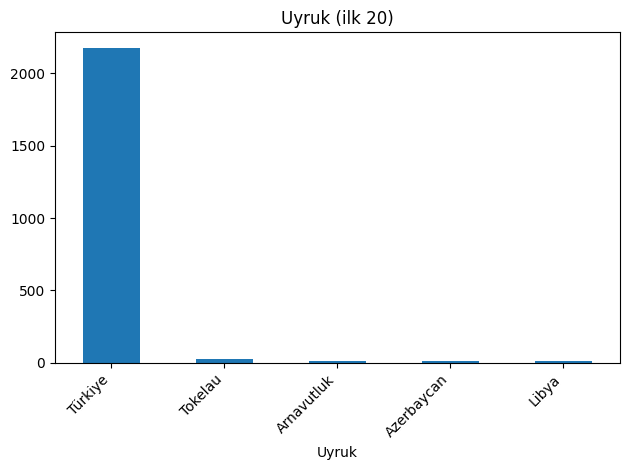


KronikHastalik — ilk 20 kategori:


KronikHastalik
NaN                                                                          611
Myastenia gravis                                                              38
Aritmi                                                                        36
Fascioscapulohumeral Distrofi                                                 36
Hipertiroidizm                                                                34
Limb-Girdle Musküler Distrofi, Astım                                          34
Kalp yetmezliği                                                               33
Hipertansiyon                                                                 31
Astım                                                                         30
Becker Musküler Distrofisi                                                    29
Limb-Girdle Musküler Distrofi                                                 28
Limb-Girdle Musküler Distrofi, Kalp yetmezliği, Astım, Polimiyozit            27
Limb-Girdle M

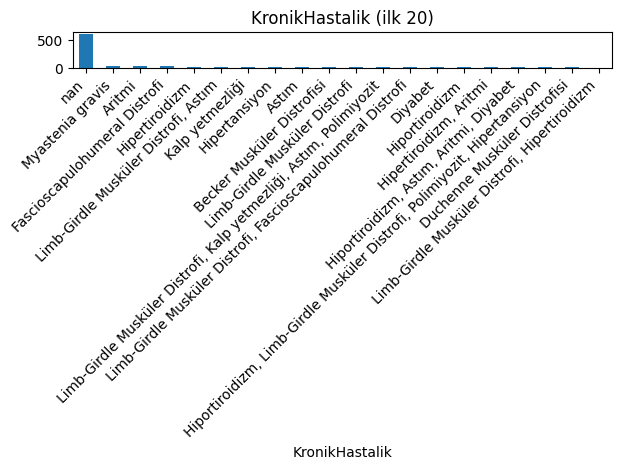

In [8]:
# 5) Kategorik dağılımlar (ilk 4 kategorik sütun örnek)
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print("Kategorik sütunlar:", cat_cols)

for c in cat_cols[:4]:
    vc = df[c].value_counts(dropna=False).head(20)
    print(f"\n{c} — ilk 20 kategori:")
    display(vc)
    vc.plot.bar()
    plt.title(f'{c} (ilk 20)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
import re
import numpy as np
import pandas as pd

def clean_tedavi_suresi(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower().strip()
    # içindeki rakamları bul
    match = re.findall(r'\d+', s)
    if match:
        return float(match[0])  # ilk bulduğu sayıyı al
    return np.nan

# TedaviSuresi'ni sayıya çevir
df['TedaviSuresi'] = df['TedaviSuresi'].apply(clean_tedavi_suresi)

# Eksikleri median ile doldur
median_val = df['TedaviSuresi'].median(skipna=True)
df['TedaviSuresi'] = df['TedaviSuresi'].fillna(median_val)

print("Sütun tipi:", df['TedaviSuresi'].dtype)
print("İlk 10 değer:", df['TedaviSuresi'].head(10).tolist())
# TedaviSuresi: metinleri tamamen sayıya çevir
df['TedaviSuresi'] = (
    df['TedaviSuresi']
    .astype(str)                       # string yap
    .str.replace(r'[^0-9.,]', '', regex=True)  # rakam ve nokta/virgül dışındaki her şeyi sil
    .str.replace(',', '.', regex=False)        # virgülü noktaya çevir
)

# Boş kalanları NaN yap ve sayısala çevir
df['TedaviSuresi'] = pd.to_numeric(df['TedaviSuresi'], errors='coerce')

# Eksikleri median ile doldur
median_val = df['TedaviSuresi'].median(skipna=True)
df['TedaviSuresi'] = df['TedaviSuresi'].fillna(median_val)

print(df['TedaviSuresi'].head(20))
print("Tip:", df['TedaviSuresi'].dtype)


Sütun tipi: float64
İlk 10 değer: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: TedaviSuresi, dtype: float64
Tip: float64


c:\Users\yade\pusula_ds_case\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\yade\pusula_ds_case\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


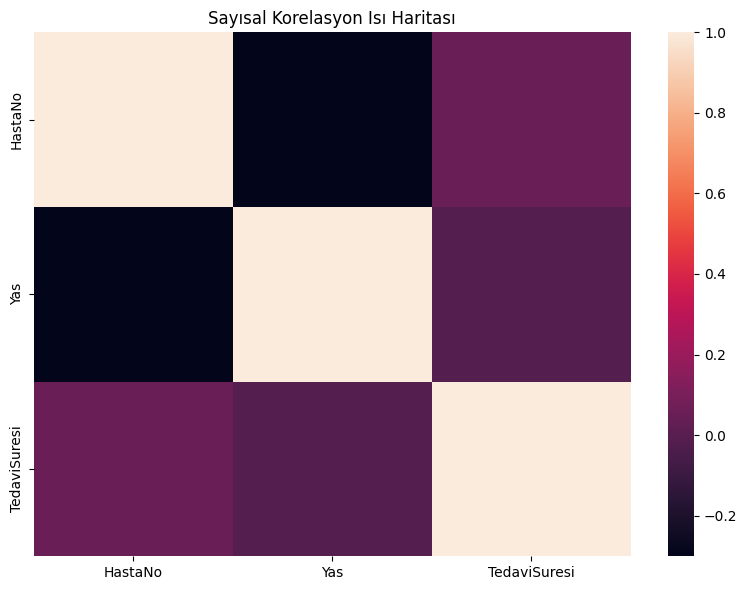

In [27]:
# 6) Korelasyon (sadece sayısal sütunlar)
num_only = df.select_dtypes(include=['number'])
if not num_only.empty:
    corr = num_only.corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=False)
    plt.title('Sayısal Korelasyon Isı Haritası')
    plt.tight_layout()
    plt.show()
else:
    print("Sayısal sütun bulunamadı.")


In [25]:
print("Tip:", df['TedaviSuresi'].dtype)
print("Benzersiz ilk 20 değer:", df['TedaviSuresi'].unique()[:20])
print("NaN sayısı:", df['TedaviSuresi'].isna().sum())
print("Toplam satır:", len(df))


Tip: float64
Benzersiz ilk 20 değer: [nan]
NaN sayısı: 2235
Toplam satır: 2235


In [26]:
from pathlib import Path
import pandas as pd
import numpy as np
import re

# 1) Orijinal dosyadan sadece TedaviSuresi sütununu geri al
data_path = Path("../data/Talent_Academy_Case_DT_2025.xlsx")
raw_ts = pd.read_excel(data_path, usecols=["TedaviSuresi"])

# 2) df ile satır sayısı uyumlu mu kontrol et
assert len(raw_ts) == len(df), "Satır sayısı tutmuyor! Yanlış dosya ya da filtre var."

# 3) Orijinali yedekle ve df'ye geri yaz
df["TedaviSuresi_raw"] = raw_ts["TedaviSuresi"]

# 4) Metinden sayıyı çıkar (5, 10, 45.5 gibi). Virgülü noktaya çevirir.
clean_num = (
    df["TedaviSuresi_raw"]
      .astype(str)
      .str.replace(r"[^0-9.,]", "", regex=True)   # rakam, nokta, virgül dışını temizle
      .str.replace(",", ".", regex=False)         # virgül -> nokta
      .str.extract(r"(\d+(?:\.\d+)?)", expand=False)  # ilk sayıyı al
)

df["TedaviSuresi"] = pd.to_numeric(clean_num, errors="coerce")

# 5) Doldurma (tamamı NaN ise fallback)
if df["TedaviSuresi"].notna().any():
    med = df["TedaviSuresi"].median()
    df["TedaviSuresi"] = df["TedaviSuresi"].fillna(med)
else:
    # hepsi NaN olursa, metin “seans” kelimeli ama sayı içermiyor olabilir -> 0 yapalım (veya en sık değer)
    df["TedaviSuresi"] = 0.0

print("Tip:", df["TedaviSuresi"].dtype)
print("Non-null sayısı:", df["TedaviSuresi"].notna().sum())
print("İlk 10 değer:", df["TedaviSuresi"].head(10).tolist())


Tip: int64
Non-null sayısı: 2235
İlk 10 değer: [5, 15, 15, 15, 15, 15, 10, 10, 10, 15]


In [28]:
# 7) Metin temizliği (strip + boşluk normalize) ve liste sütunları örneği
text_cols_expected = ['Cinsiyet','KanGrubu','Uyruk','KronikHastalik','Bolum',
                      'Alerji','Tanilar','TedaviAdi','UygulamaYerleri','UygulamaSuresi']
text_cols = [c for c in text_cols_expected if c in df.columns]

for c in text_cols:
    df[c] = df[c].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

import re
def to_minutes(x):
    s = str(x).lower().strip()
    if s in ['nan','','none']: return np.nan
    m = re.findall(r'(\d+(?:[.,]\d+)?)\s*(saat|dk|min)?', s)
    if not m:
        try: return float(s)
        except: return np.nan
    val, unit = m[0]
    val = float(val.replace(',','.'))
    if unit in [None,'', 'dk','min']: return val
    if unit=='saat': return val*60
    return val
if 'UygulamaSuresi' in df.columns:
    df['UygulamaSuresi'] = df['UygulamaSuresi'].apply(to_minutes)

# Liste sütunları
list_cols = [c for c in ['KronikHastalik','Alerji','Tanilar','UygulamaYerleri'] if c in df.columns]
def split_list(s):
    if pd.isna(s) or s in ['nan','None']: return []
    return [t.strip().title() for t in str(s).split(',') if t.strip()]
for c in list_cols:
    df[c] = df[c].apply(split_list)

df.head()


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_raw
0,145134,60,Kadın,0 Rh+,Türkiye,"[Becker Musküler Distrofisi, Hiportiroidizm, K...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[Toz],[Ayak Bileği Ve Ayağın Yüzeysel Yaralanması],Ayak Bileği,5,[Ayak Bileği],20.0,5 Seans
1,145135,28,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15,[Boyun],20.0,15 Seans
2,145135,28,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15,"[Boyun, Sırt]",20.0,15 Seans
3,145135,28,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15,[Boyun],5.0,15 Seans
4,145135,28,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15,"[Boyun, Sırt]",20.0,15 Seans


In [29]:
# 8) Eksik değer doldurma (basit örnek): sayısal=median, kategorik=mode
from sklearn.impute import SimpleImputer

# Sayısallar
num_cols = df.select_dtypes(include=['number']).columns
if len(num_cols)>0:
    imp_num = SimpleImputer(strategy='median')
    df[num_cols] = imp_num.fit_transform(df[num_cols])

# Kategorikler (liste olmayan metinler için)
non_num = df.select_dtypes(exclude=['number']).columns
# Listeleri atlayalım:
simple_cat = [c for c in non_num if not (df[c].apply(lambda x: isinstance(x, list)).all())]
if len(simple_cat)>0:
    imp_cat = SimpleImputer(strategy='most_frequent')
    df[simple_cat] = imp_cat.fit_transform(df[simple_cat])

df.head()


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_raw
0,145134.0,60.0,Kadın,0 Rh+,Türkiye,"[Becker Musküler Distrofisi, Hiportiroidizm, K...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[Toz],[Ayak Bileği Ve Ayağın Yüzeysel Yaralanması],Ayak Bileği,5.0,[Ayak Bileği],20.0,5 Seans
1,145135.0,28.0,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15.0,[Boyun],20.0,15 Seans
2,145135.0,28.0,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15.0,"[Boyun, Sırt]",20.0,15 Seans
3,145135.0,28.0,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15.0,[Boyun],5.0,15 Seans
4,145135.0,28.0,Erkek,0 Rh+,Türkiye,"[Duchenne Musküler Distrofisi, Myastenia Gravi...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",[],"[Omuzun Darbe Sendromu, Dorsalji̇, Di̇ğer, Ser...",Dorsalji -Boyun+trapez+skapular,15.0,"[Boyun, Sırt]",20.0,15 Seans


In [30]:
# 9) Temiz veriyi kaydetme
output_path = Path("../outputs/cleaned_dataset.csv")
df.to_csv(output_path, index=False)
print("Kaydedildi:", output_path.as_posix())


Kaydedildi: ../outputs/cleaned_dataset.csv
